In [1]:

import pandas as pd
# 열 다보이게
pd.set_option('display.max_columns', None)


In [2]:
data = pd.read_csv('batter.csv')

In [3]:
data.head()

,이름,연도,WAR,G,타석,타수,득점,안타,2타,3타,홈런,루타,타점,도루,도실,볼넷,사구,고4,삼진,병살,희타,희비,타율,출루,장타,OPS,wRC+
0,김도영,2024,8.32,141,625,544,143,189,29,10,38,352,109,40,4,66,7,7,110,10,1,7,0.347,0.420,0.647,1.067,172.5
1,로하스,2024,6.50,144,670,572,108,188,39,1,32,325,112,2,1,88,6,9,115,10,0,4,0.329,0.421,0.568,0.989,153.3
2,송성문,2024,6.13,142,602,527,88,179,29,4,19,273,104,21,0,64,3,2,82,5,0,8,0.340,0.409,0.518,0.927,148.9
3,구자욱,2024,5.69,129,568,493,92,169,39,1,33,309,115,13,4,55,12,4,73,6,2,6,0.343,0.417,0.627,1.044,162.3
4,김혜성,2024,5.16,127,567,509,90,166,26,4,11,233,75,30,6,47,4,2,62,6,0,7,0.326,0.383,0.458,0.841,124.1


In [4]:
# null값 확인
data.isnull().sum()

이름      0
연도      0
WAR     0
G       0
타석      0
타수      0
득점      0
안타      0
2타      0
3타      0
홈런      0
루타      0
타점      0
도루      0
도실      0
볼넷      0
사구      0
고4      0
삼진      0
병살      0
희타      0
희비      0
타율      0
출루      0
장타      0
OPS     0
wRC+    0
dtype: int64

In [5]:
# 장타 ,OPS, WRC+, 루타는 홈런개수가 이미 포함되어 있기 때문에 삭제
data = data.drop(['장타','OPS','wRC+','루타'], axis=1)

In [6]:
# 이름 연도는 임시 보관
name = data['이름']
year = data['연도']
# 이름 연도 제거
data = data.drop(['이름', '연도'], axis=1)

In [7]:
corr= data.corr()
corr_col = corr.index[abs(corr['홈런']) >= 0.4]
corr_col

Index(['WAR', '타석', '득점', '안타', '2타', '홈런', '타점', '볼넷', '고4', '삼진', '희타',
       '출루'],
      dtype='object')

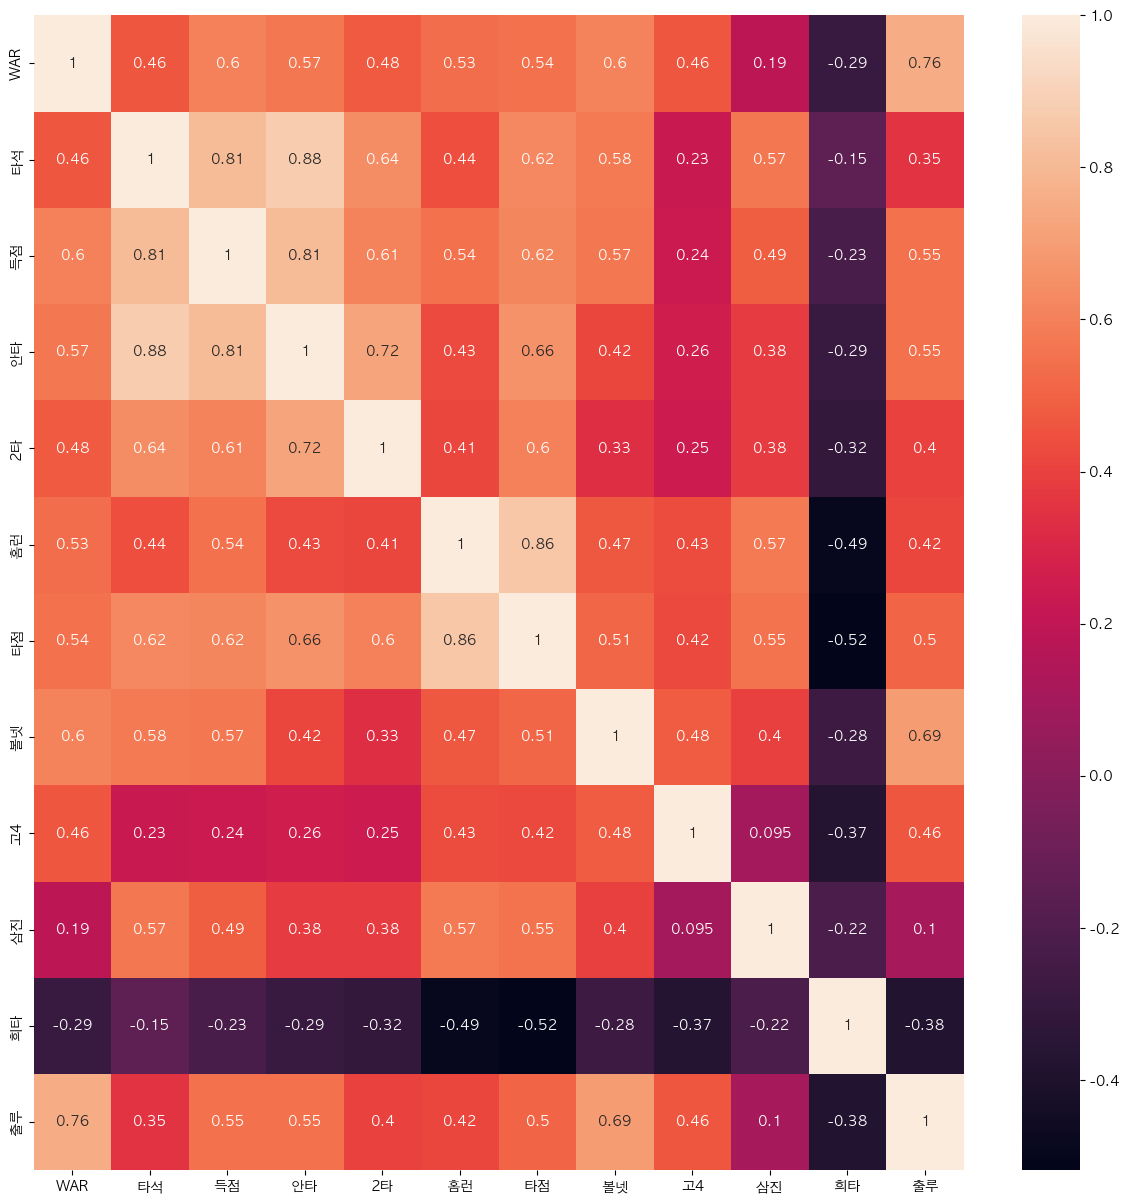

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'AppleGothic' # macOS font
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(15,15))
heatmap = sns.heatmap(data[corr_col].corr(), annot=True, )

In [9]:
corr_col

Index(['WAR', '타석', '득점', '안타', '2타', '홈런', '타점', '볼넷', '고4', '삼진', '희타',
       '출루'],
      dtype='object')

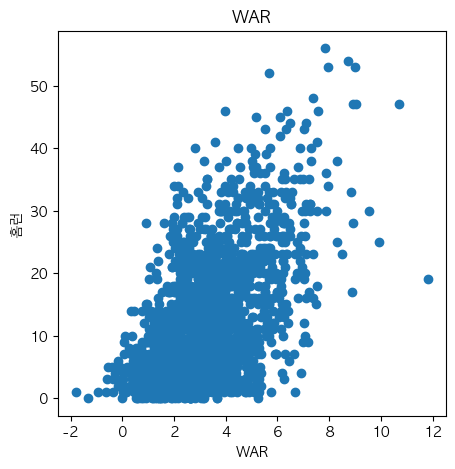

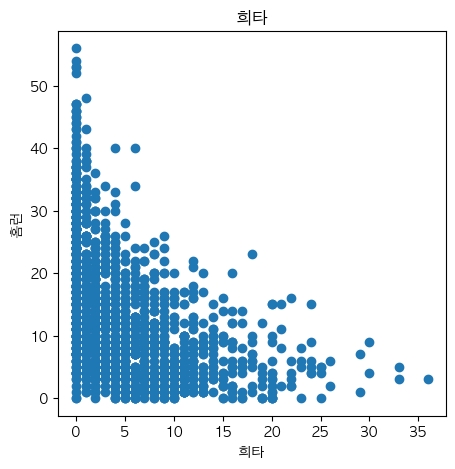

In [10]:
# 함수로 만들기 - 특정 컬럼 넣으면 해당 컬럼 Scatter plot 출력
def scatter_plot(col):
    plt.figure(figsize=(5,5))
    plt.scatter(data[col], data['홈런'])
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('홈런')
    plt.show()
    
scatter_plot('WAR')
scatter_plot('희타')


In [13]:
# 학습데이터 1982~2023년
# 테스트데이터 2024년 타자
# 독립변수 'WAR', '타석', '득점', '안타', '2타', '타점', '볼넷', '고4', '삼진', '희타', '출루'
# 종속변수 '홈런'

# 분석 방법, 회귀, 랜덤포레스트, XGBoost, LightGBM 등

In [14]:
data

,WAR,G,타석,타수,득점,안타,2타,3타,홈런,타점,도루,도실,볼넷,사구,고4,삼진,병살,희타,희비,타율,출루
0,8.32,141,625,544,143,189,29,10,38,109,40,4,66,7,7,110,10,1,7,0.347,0.420
1,6.50,144,670,572,108,188,39,1,32,112,2,1,88,6,9,115,10,0,4,0.329,0.421
2,6.13,142,602,527,88,179,29,4,19,104,21,0,64,3,2,82,5,0,8,0.340,0.409
3,5.69,129,568,493,92,169,39,1,33,115,13,4,55,12,4,73,6,2,6,0.343,0.417
4,5.16,127,567,509,90,166,26,4,11,75,30,6,47,4,2,62,6,0,7,0.326,0.383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670,0.02,76,302,263,37,69,11,1,1,28,15,10,27,1,0,27,4,7,4,0.262,0.329
1671,-0.16,80,298,268,35,62,8,0,2,21,8,4,20,5,1,23,11,4,1,0.231,0.296
1672,-0.37,76,256,229,30,55,14,1,3,26,10,5,22,3,0,26,8,1,1,0.240,0.314
1673,-0.38,74,270,246,27,56,5,1,1,23,6,6,21,0,0,32,3,2,1,0.228,0.287


In [542]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [15]:
data = pd.read_csv('batter.csv')
X = data[['WAR', '타석', '득점', '안타', '2타', '타점', '볼넷', '고4', '삼진', '희타', '출루']]
y = data['홈런']

In [16]:
# 학습 데이터(1982~2023)와 테스트 데이터(2024) 분리
train_data = data[data['연도'] < 2024]
test_data = data[data['연도'] == 2024]

In [17]:

X_train = train_data[['WAR', '타석', '득점', '안타', '2타', '타점', '볼넷', '고4', '삼진', '희타', '출루']]
y_train = train_data['홈런']

X_test = test_data[['WAR', '타석', '득점', '안타', '2타', '타점', '볼넷', '고4', '삼진', '희타', '출루']]
y_test = test_data['홈런']

                                 OLS Regression Results                                
Dep. Variable:                     홈런   R-squared (uncentered):                   0.946
Model:                            OLS   Adj. R-squared (uncentered):              0.946
Method:                 Least Squares   F-statistic:                              2835.
Date:                Mon, 16 Dec 2024   Prob (F-statistic):                        0.00
Time:                        00:02:51   Log-Likelihood:                         -4508.6
No. Observations:                1633   AIC:                                      9037.
Df Residuals:                    1623   BIC:                                      9091.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

/var/folders/v7/9lcjwr652mz9gm833k4kvwzw0000gn/T/ipykernel_930/3389296494.py:95: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['LinearRegression_예측 홈런'] = y_pred


=== RandomForest ===
Mean Squared Error (MSE): 22.81
R-squared (R2): 0.80
=== Feature Importance for RandomForest ===


/var/folders/v7/9lcjwr652mz9gm833k4kvwzw0000gn/T/ipykernel_930/3389296494.py:122: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[f'{model_name}_예측 홈런'] = y_pred


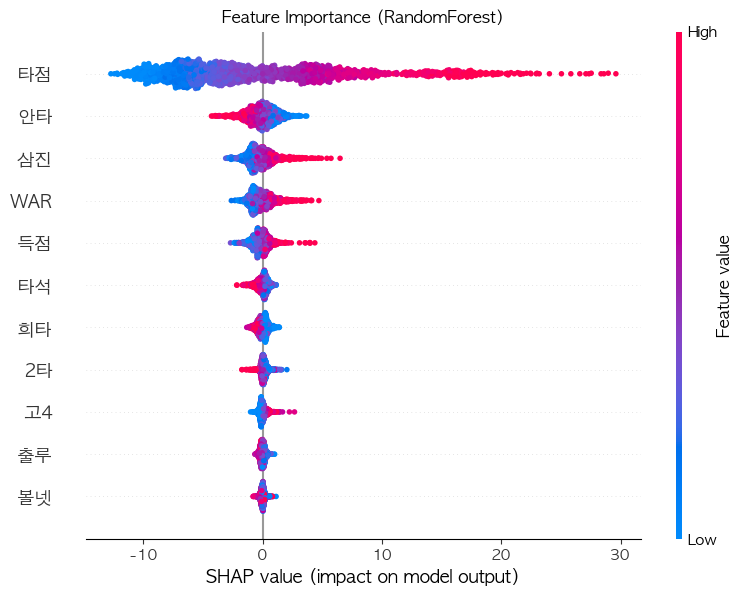

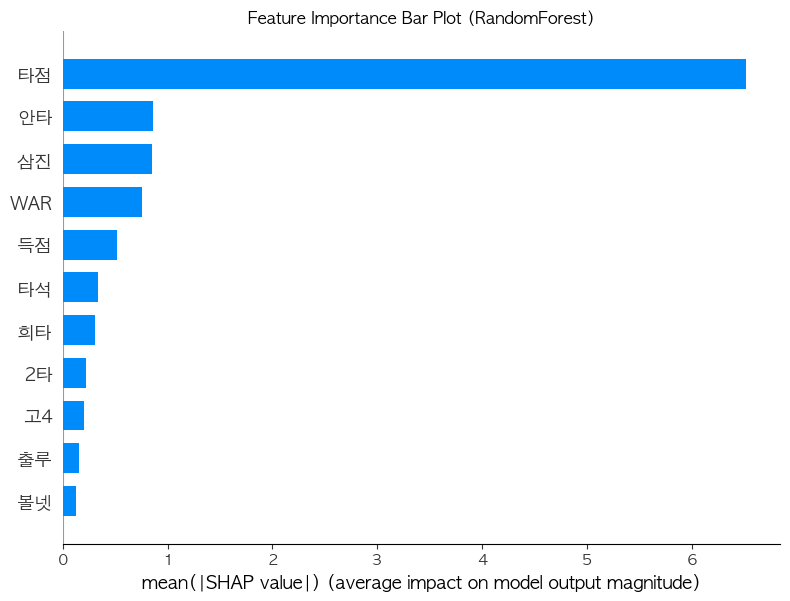

=== SVR ===
Mean Squared Error (MSE): 15.22
R-squared (R2): 0.87
=== Feature Importance for SVR ===
SHAP visualization not supported for SVR


/var/folders/v7/9lcjwr652mz9gm833k4kvwzw0000gn/T/ipykernel_930/3389296494.py:122: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[f'{model_name}_예측 홈런'] = y_pred


=== XGBoost ===
Mean Squared Error (MSE): 20.39
R-squared (R2): 0.83
=== Feature Importance for XGBoost ===


/var/folders/v7/9lcjwr652mz9gm833k4kvwzw0000gn/T/ipykernel_930/3389296494.py:122: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[f'{model_name}_예측 홈런'] = y_pred


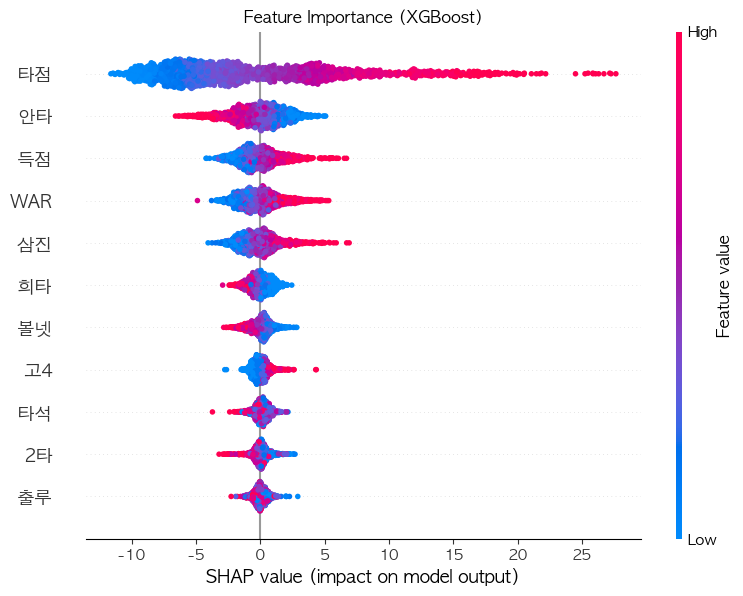

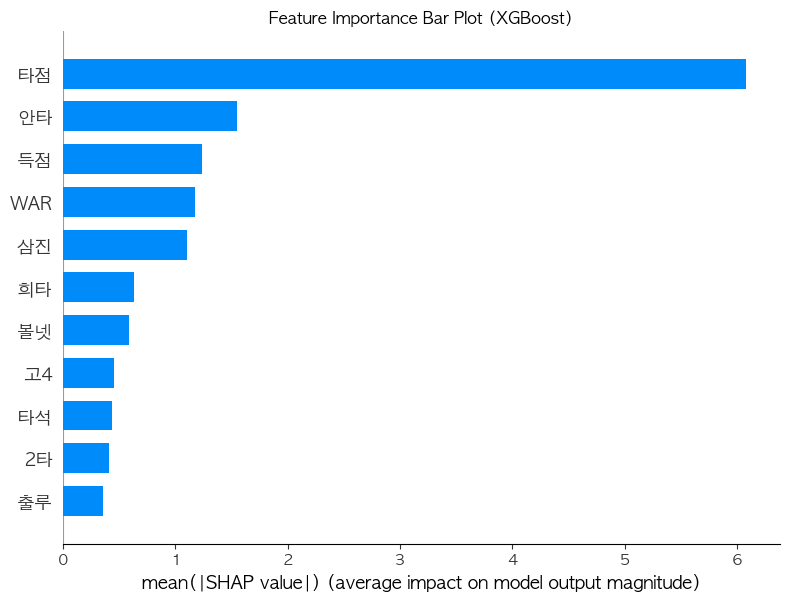

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000259 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1292
[LightGBM] [Info] Number of data points in the train set: 1633, number of used features: 11
[LightGBM] [Info] Start training from score 13.230863
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain,

/var/folders/v7/9lcjwr652mz9gm833k4kvwzw0000gn/T/ipykernel_930/3389296494.py:122: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[f'{model_name}_예측 홈런'] = y_pred


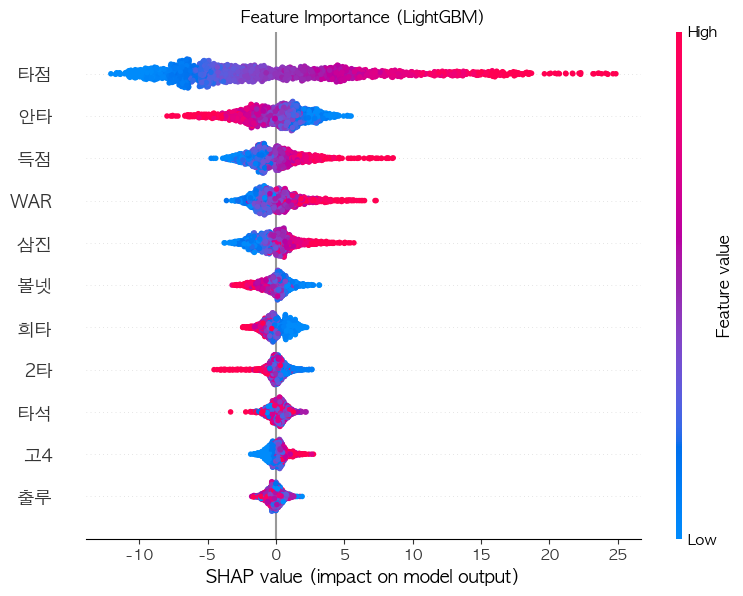

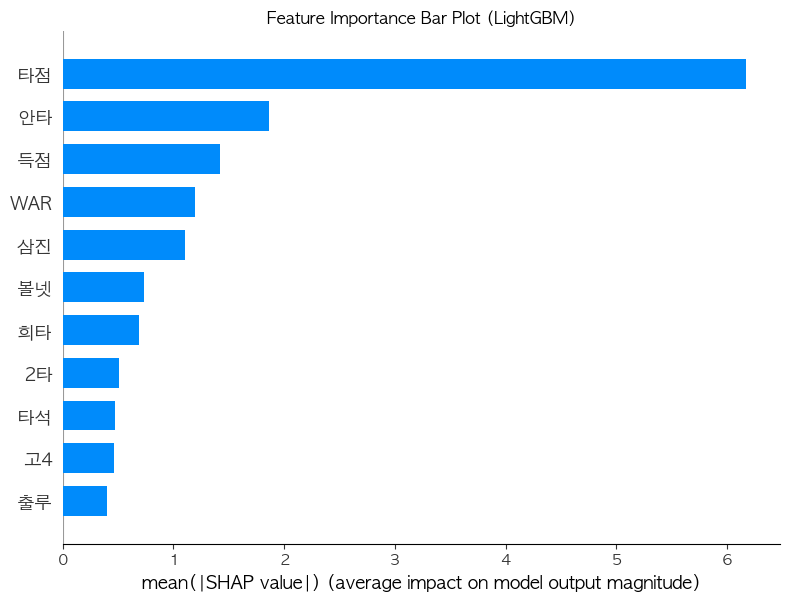

=== CatBoost ===
Mean Squared Error (MSE): 16.87
R-squared (R2): 0.86
=== Feature Importance for CatBoost ===


/var/folders/v7/9lcjwr652mz9gm833k4kvwzw0000gn/T/ipykernel_930/3389296494.py:122: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[f'{model_name}_예측 홈런'] = y_pred


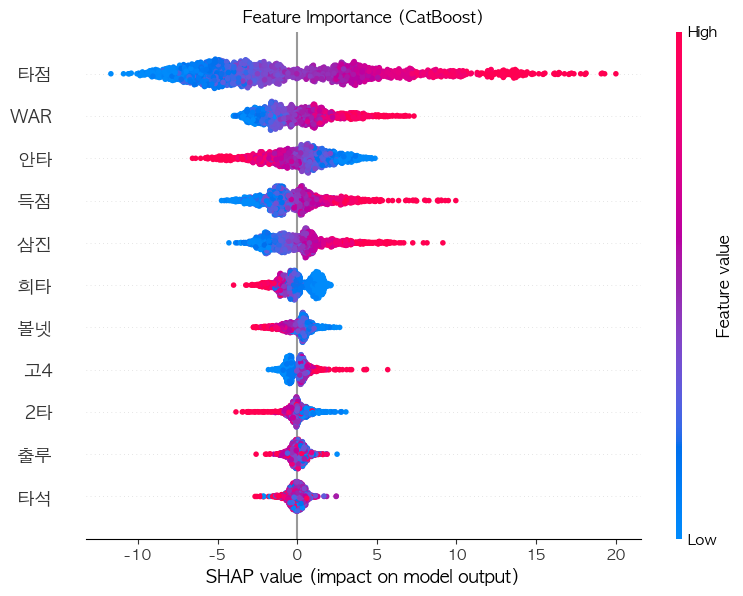

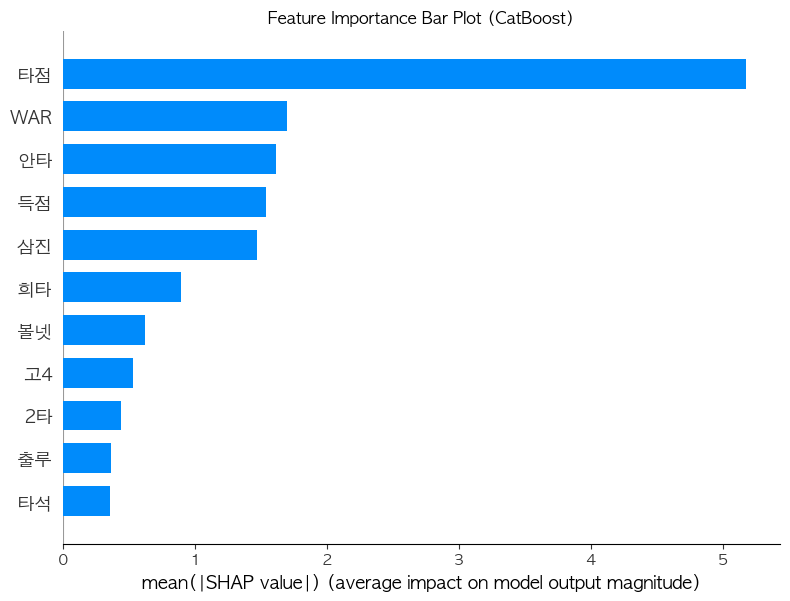

=== GradientBoosting ===
Mean Squared Error (MSE): 22.73
R-squared (R2): 0.81
=== Feature Importance for GradientBoosting ===


/var/folders/v7/9lcjwr652mz9gm833k4kvwzw0000gn/T/ipykernel_930/3389296494.py:122: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[f'{model_name}_예측 홈런'] = y_pred


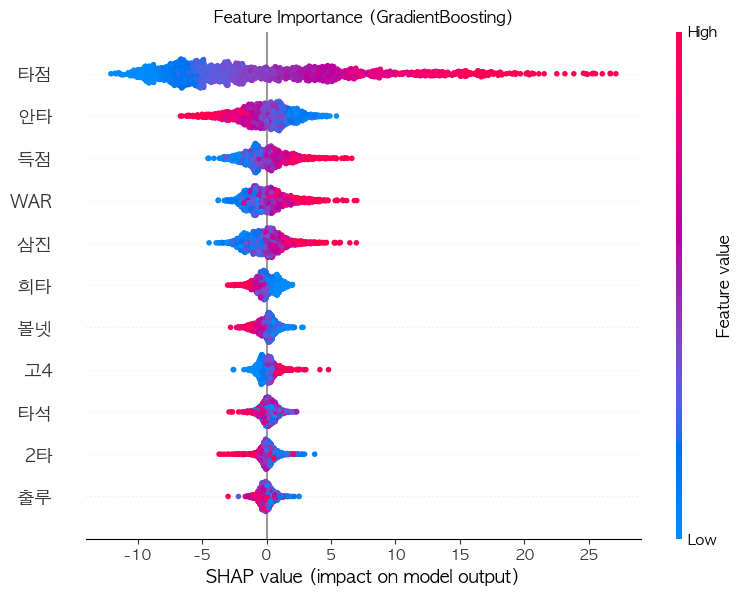

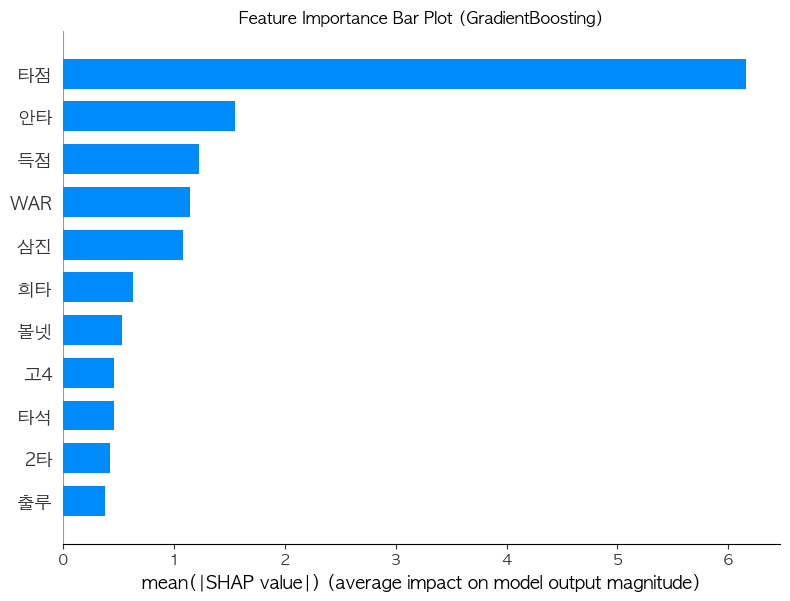

       이름    연도  홈런  RandomForest_예측 홈런  SVR_예측 홈런  XGBoost_예측 홈런  \
0     김도영  2024  38               39.33  40.440865      40.915508   
1     로하스  2024  32               30.93  29.840626      32.088177   
2     송성문  2024  19               25.21  24.854023      22.777271   
3     구자욱  2024  33               29.24  28.508126      28.836542   
4     김혜성  2024  11               16.02  14.031056      13.999419   
5     오스틴  2024  32               34.44  36.010651      34.383450   
6     홍창기  2024   5               16.12  13.017733      11.790679   
7     박민우  2024   8                7.59   7.035913       8.027359   
8      최정  2024  37               31.55  35.885271      31.151554   
9    에레디아  2024  21               28.57  26.752543      30.192646   
10    박동원  2024  20               20.92  21.919222      21.483770   
11    문보경  2024  22               26.62  23.111031      23.474592   
12    김지찬  2024   3                3.30   4.122164       3.437772   
13   데이비슨  2024  46               

In [18]:
import shap
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
import statsmodels.api as sm


mse_list = []
r2_list = []
# 정규화 여부 확인 함수
def normalize_data(model, X_train, X_test):
    if isinstance(model, (SVR)):
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
    return X_train, X_test

# 모델 리스트 정의
models = {
    'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42),
    'SVR': SVR(kernel='rbf', C=10, gamma=0.1),
    'XGBoost': XGBRegressor(n_estimators=1000, learning_rate=0.1, max_depth=5, random_state=42),
    'LightGBM': LGBMRegressor(n_estimators=1000, learning_rate=0.1, max_depth=5, random_state=42),
    'CatBoost': CatBoostRegressor(iterations=1000, learning_rate=0.1, depth=5, random_state=42, verbose=0),
    'GradientBoosting': GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, max_depth=5, random_state=42),
    #'KNN': KNeighborsRegressor(n_neighbors=5),
    #'ElasticNet': ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42),
}

# Feature Importance 계산 및 시각화 함수
def visualize_feature_importance(model, model_name, X_train):
    print(f"=== Feature Importance for {model_name} ===")
    
    # SHAP Explainer 생성
    if hasattr(model, "feature_importances_"):  # Tree-based 모델 (RandomForest, LightGBM 등)
        explainer = shap.TreeExplainer(model)
    elif hasattr(model, "coef_"):  # 선형 모델 (ElasticNet 등)
        explainer = shap.LinearExplainer(model, X_train)
    else:
        print(f"SHAP visualization not supported for {model_name}")
        return

    # SHAP values 계산
    shap_values = explainer.shap_values(X_train)
    
    # Summary plot
    shap.summary_plot(shap_values, X_train, show=False)
    plt.title(f"Feature Importance ({model_name})")
    plt.show()

    # Bar plot
    shap.summary_plot(shap_values, X_train, plot_type="bar", show=False)
    plt.title(f"Feature Importance Bar Plot ({model_name})")
    plt.show()


# # statsmodels로 선형 회귀 처리
def run_statsmodels(X_train, y_train, X_test):
    # 절편 제거 (add_constant 사용하지 않음)
    
    # 타석 & 출루 제거
    X_train_no_const = X_train.drop(['타석'], axis=1)
    X_test_no_const = X_test.drop(['타석'], axis=1)
    
    #X_train_no_const = X_train
    #X_test_no_const = X_test
    
    # 모델 학습 (절편 제거)
    model = sm.OLS(y_train, X_train_no_const).fit()

    # 모델 요약 출력 (p-value와 통계적 검증 결과 포함)
    print(model.summary())

    # 예측
    y_pred = model.predict(X_test_no_const)

    # 평가
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"=== Statsmodels LinearRegression ===")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"R-squared (R2): {r2:.2f}")

    mse_list.append(mse)
    r2_list.append(r2)
    test_data['LinearRegression_예측 홈런'] = y_pred


# 선형 회귀(statsmodels) 실행
run_statsmodels(X_train, y_train, X_test)

# scikit-learn 모델 실행 (SHAP 시각화 포함)
for model_name, model in models.items():
    # 정규화 여부에 따른 데이터 변환
    X_train_scaled, X_test_scaled = normalize_data(model, X_train, X_test)
    
    # 모델 학습
    model.fit(X_train_scaled, y_train)
    
    # 예측
    y_pred = model.predict(X_test_scaled)
    
    # 평가
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"=== {model_name} ===")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"R-squared (R2): {r2:.2f}")
    
    mse_list.append(mse)
    r2_list.append(r2)
    # 결과 저장
    test_data[f'{model_name}_예측 홈런'] = y_pred
    
    # Feature Importance 시각화
    visualize_feature_importance(model, model_name, pd.DataFrame(X_train_scaled, columns=X_train.columns))

# 최종 결과 출력
print(test_data[['이름', '연도', '홈런'] + [f'{name}_예측 홈런' for name in models.keys()] + ['LinearRegression_예측 홈런']])


In [20]:
len(mse_list)


7

In [21]:
len(r2_list)

7

In [22]:
#  models 사전에 첫번째에 LINEARREGRESSION 추가 value는 아무거나 넣기

models = {
    'LinearRegression': 0,
    'RandomForest': RandomForestRegressor(n_estimators=100, random_state=42),
    'SVR': SVR(kernel='rbf', C=10, gamma=0.1),
    'XGBoost': XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42),
    'LightGBM': LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42),
    'CatBoost': CatBoostRegressor(iterations=100, learning_rate=0.1, depth=5, random_state=42, verbose=0),
    'GradientBoosting': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42),
    #'KNN': KNeighborsRegressor(n_neighbors=5),
    #'ElasticNet': ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=42),
}


In [24]:
# mse_list, r2_list에 저장된 값들을 dataFrame으로 변환

result = pd.DataFrame({'Model': models.keys(), 'MSE': mse_list, 'R2': r2_list})

result

,Model,MSE,R2
0,LinearRegression,16.504047,0.858767
1,RandomForest,22.814467,0.804766
2,SVR,15.216033,0.869789
3,XGBoost,20.391116,0.825504
4,LightGBM,24.561355,0.789817
5,CatBoost,16.873888,0.855602
6,GradientBoosting,22.732887,0.805464


In [26]:
test_data

,이름,연도,WAR,G,타석,타수,득점,안타,2타,3타,홈런,루타,타점,도루,도실,볼넷,사구,고4,삼진,병살,희타,희비,타율,출루,장타,OPS,wRC+,LinearRegression_예측 홈런,RandomForest_예측 홈런,SVR_예측 홈런,XGBoost_예측 홈런,LightGBM_예측 홈런,CatBoost_예측 홈런,GradientBoosting_예측 홈런
0,김도영,2024,8.32,141,625,544,143,189,29,10,38,352,109,40,4,66,7,7,110,10,1,7,0.347,0.420,0.647,1.067,172.5,37.161106,39.33,40.440865,40.915508,45.853358,41.632243,39.989141
1,로하스,2024,6.50,144,670,572,108,188,39,1,32,325,112,2,1,88,6,9,115,10,0,4,0.329,0.421,0.568,0.989,153.3,28.761916,30.93,29.840626,32.088177,26.178456,27.745419,27.565983
2,송성문,2024,6.13,142,602,527,88,179,29,4,19,273,104,21,0,64,3,2,82,5,0,8,0.340,0.409,0.518,0.927,148.9,23.351926,25.21,24.854023,22.777271,24.795463,26.326811,24.061938
3,구자욱,2024,5.69,129,568,493,92,169,39,1,33,309,115,13,4,55,12,4,73,6,2,6,0.343,0.417,0.627,1.044,162.3,28.025903,29.24,28.508126,28.836542,26.378273,27.067055,29.442247
4,김혜성,2024,5.16,127,567,509,90,166,26,4,11,233,75,30,6,47,4,2,62,6,0,7,0.326,0.383,0.458,0.841,124.1,15.660194,16.02,14.031056,13.999419,15.623329,16.257915,16.806397
5,오스틴,2024,5.06,140,604,527,99,168,32,3,32,302,132,12,8,61,3,6,82,9,0,13,0.319,0.384,0.573,0.957,147.8,35.644445,34.44,36.010651,34.383450,35.618683,33.978062,34.512795
6,홍창기,2024,5.06,139,637,524,96,176,18,3,5,215,73,10,11,96,12,3,93,8,1,4,0.336,0.447,0.410,0.857,142.3,13.280877,16.12,13.017733,11.790679,11.168919,10.625256,12.898675
7,박민우,2024,4.70,121,528,457,75,150,26,2,8,204,50,32,7,54,9,4,79,5,4,4,0.328,0.406,0.446,0.852,129.6,8.180977,7.59,7.035913,8.027359,8.813534,7.568399,8.422262
8,최정,2024,4.55,129,550,468,93,136,27,2,37,278,107,5,1,55,20,1,114,10,0,7,0.291,0.384,0.594,0.978,145.9,33.148653,31.55,35.885271,31.151554,32.917587,36.866203,33.510261
9,에레디아,2024,4.42,136,591,541,82,195,31,1,21,291,118,4,3,28,13,3,73,12,0,9,0.360,0.399,0.538,0.937,137.2,25.138579,28.57,26.752543,30.192646,29.149984,28.507723,29.909543


In [27]:
# 모델이 예측한 홈런 개수 반올림

for model_name in models.keys():
    test_data[f'{model_name}_예측 홈런'] = test_data[f'{model_name}_예측 홈런'].apply(round)
    

/var/folders/v7/9lcjwr652mz9gm833k4kvwzw0000gn/T/ipykernel_930/1466290320.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[f'{model_name}_예측 홈런'] = test_data[f'{model_name}_예측 홈런'].apply(round)


In [28]:
# 최종 결과 저장
test_data.to_csv('batter_prediction.csv', index=False)

In [29]:
test_data['이름']

0       김도영
1       로하스
2       송성문
3       구자욱
4       김혜성
5       오스틴
6       홍창기
7       박민우
8        최정
9      에레디아
10      박동원
11      문보경
12      김지찬
13     데이비슨
14      권희동
15      김주원
16      강승호
17      박성한
18    소크라테스
19     레이예스
20      강민호
21      장성우
22      양의지
23      허경민
24      윤동희
25      김재환
26      고승민
27      이재현
28      정수빈
29      박찬호
30      신민재
31      노시환
32      김선빈
33      김영웅
34      김휘집
35      나승엽
36      최원준
37      양석환
38      페라자
39      강백호
40      박해민
41      이주형
Name: 이름, dtype: object

In [31]:
# 박민우의 2024년 실제홈런과 홈런 예측 비교
test_data[test_data['이름'] == '박민우'][['이름', '연도', '홈런'] + [f'{name}_예측 홈런' for name in models.keys()]]

,이름,연도,홈런,LinearRegression_예측 홈런,RandomForest_예측 홈런,SVR_예측 홈런,XGBoost_예측 홈런,LightGBM_예측 홈런,CatBoost_예측 홈런,GradientBoosting_예측 홈런
7,박민우,2024,8,8,8,7,8,9,8,8


In [32]:
# 김도영의 2024년 실제홈런과 홈런 예측 비교
test_data[test_data['이름'] == '김도영'][['이름', '연도', '홈런'] + [f'{name}_예측 홈런' for name in models.keys()]]

,이름,연도,홈런,LinearRegression_예측 홈런,RandomForest_예측 홈런,SVR_예측 홈런,XGBoost_예측 홈런,LightGBM_예측 홈런,CatBoost_예측 홈런,GradientBoosting_예측 홈런
0,김도영,2024,38,37,39,40,41,46,42,40
